# New Section

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
from tensorflow.keras.applications.vgg16 import  VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from PIL import Image
from tensorflow.keras.layers import Dense,Reshape,Conv2D,Flatten,Dropout,Input,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow 
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Load 1000 trainig images samples
X_image_train_temp = np.load('./Capstone/Pneumonia_Detection/preocessed_training_images/Channel_1/X_image_train_1k.npy')

In [8]:
# Load 500 testing images samples
X_image_test_temp = np.load('./Capstone/Pneumonia_Detection/preocessed_training_images/Channel_1/X_image_test_5h.npy')

In [9]:
# Here, I am using VGG16 model
# And using input shape (224,224,3) 3 channels.
# And using 'imagenet weights'. 
# This is the basic classification model.
def createModel(trainBaseModel=True):
    inputShape = (image_size,image_size,3)
    basemodel = VGG16(include_top=False,input_shape=inputShape,weights='imagenet')
    
    for layer in basemodel.layers:
        layer.trainable = trainBaseModel
    
    # basemodel_output =  basemodel.get_layer('block5_conv3').output
    # flat_reg = Flatten()(basemodel_output)
    # dense = Dense(1024,activation='relu',name='MJ_1_layer_reg')(flat_reg)
    # drop = Dropout(0.2)(dense)
    # output_reg = Dense(4,activation='linear',name='output_reg')(drop)
    
    flat_class = Flatten()(basemodel_output)
    dense = Dense(1024,activation='relu',name='MJ_1_layer_dense')(flat_class)
    drop = Dropout(0.2)(dense)
    output_class = Dense(2,activation='softmax',name='output_class')(drop)
    
    return Model(inputs=basemodel.input, outputs=[output_class])

In [10]:
model = createModel(False)


In [17]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

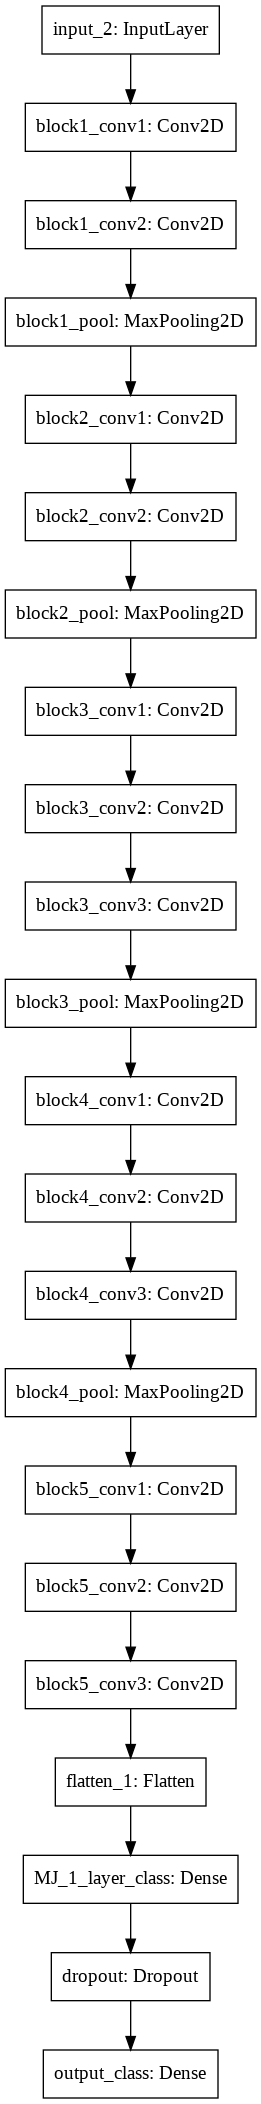

In [9]:
plot_model(model,'/model.png')

In [11]:
y_target_test = np.load('./Capstone/Pneumonia_Detection/test_input_numpy/y_target_train.npy')[0:500]
y_box_test = np.load('./Capstone/Pneumonia_Detection/test_input_numpy/y_box_train.npy')[0:500]

In [12]:
y_target_train = np.load('./Capstone/Pneumonia_Detection/y_target_train.npy')[0:1000]
y_box_train = np.load('./Capstone/Pneumonia_Detection/y_box_train.npy')[0:1000]

In [13]:
y_target_test = tf.keras.utils.to_categorical(y_target_test,num_classes=2)

In [14]:
y_target_train = tf.keras.utils.to_categorical(y_target_train,num_classes=2)

In [16]:
# Use earlystopping
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq='epoch')

# Use earlystopping
stop = EarlyStopping(monitor="val_loss", patience=2, mode="min",min_delta=0.01)

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy']) # Regression loss is MSE, Classificaiton: categorical_crossentropy

# Fit the model
history = model.fit(x=X_image_train_temp, y=y_target_train,validation_data=(X_image_test_temp,y_target_test), epochs=10, batch_size=128) 

Epoch 1/10
8/8 [==============================] - 700s 88s/step - loss: 60.2485 - accuracy: 0.7280 - val_loss: 79.3413 - val_accuracy: 0.5960
Epoch 2/10
8/8 [==============================] - 695s 87s/step - loss: 8.5367 - accuracy: 0.8910 - val_loss: 9.4288 - val_accuracy: 0.8040
Epoch 3/10
8/8 [==============================] - 695s 87s/step - loss: 1.6556 - accuracy: 0.9360 - val_loss: 7.1797 - val_accuracy: 0.7820
Epoch 4/10
8/8 [==============================] - 698s 87s/step - loss: 0.3696 - accuracy: 0.9730 - val_loss: 10.5044 - val_accuracy: 0.7100
Epoch 5/10
8/8 [==============================] - 698s 87s/step - loss: 0.2221 - accuracy: 0.9830 - val_loss: 6.8278 - val_accuracy: 0.7940
Epoch 6/10
8/8 [==============================] - 698s 87s/step - loss: 0.0664 - accuracy: 0.9930 - val_loss: 9.0620 - val_accuracy: 0.7280
Epoch 7/10
8/8 [==============================] - 701s 88s/step - loss: 0.0416 - accuracy: 0.9960 - val_loss: 8.9276 - val_accuracy: 0.7300
Epoch 8/10
8/8 [=

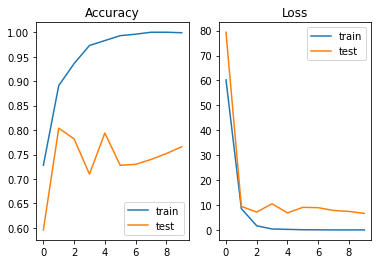

In [20]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('Accuracy')
ax[0].plot(history.history['accuracy'],label='train')
ax[0].plot(history.history['val_accuracy'],label='test')
ax[0].legend()

ax[1].set_title('Loss')
ax[1].plot(history.history['loss'],label='train')
ax[1].plot(history.history['val_loss'],label='test')
ax[1].legend()
# By checking the accuracy and loss plots, suggest that the model has good fit on the problem.